## QQ Plot

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')

<Axes: xlabel='sepal_length', ylabel='Density'>

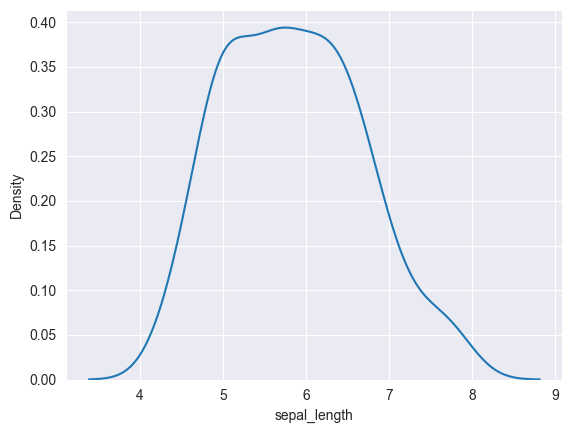

In [3]:
sns.kdeplot(df['sepal_length'])

In [4]:
temp = sorted(df['sepal_length'].tolist())
print(temp[:10])

[4.3, 4.4, 4.4, 4.4, 4.5, 4.6, 4.6, 4.6, 4.6, 4.7]


In [5]:
y_quant = []

for i in range(1, 101):
    y_quant.append(np.percentile(temp, i))

print(y_quant[:10])

[4.4, 4.4, 4.547, 4.6, 4.6, 4.694, 4.743, 4.8, 4.8, 4.8]


In [6]:
# this will create normal distribution with mean = 0, std dev = 1, and 1000 points
samples = np.random.normal(loc=0, scale=1, size=1000)
print(samples[:10])

[ 1.2636923   0.35628361 -1.17591317  0.19594776  0.44934798 -0.24680432
 -0.45230046  1.4346117  -1.22582059 -0.10325317]


In [7]:
x_quant = []

for i in range(1, 101):
    x_quant.append(np.percentile(samples, i))

print(x_quant[:10])

[-2.3405528600010306, -2.112811197160083, -1.9624232783669024, -1.8761654353267918, -1.7737795576848585, -1.6928313220154623, -1.5281606905389646, -1.4130351065074598, -1.3570333746022238, -1.3002153831015935]


<Axes: >

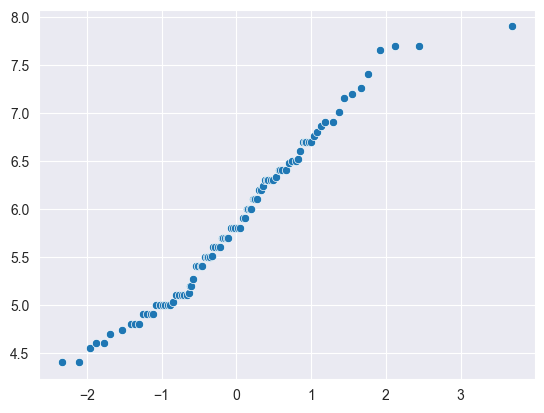

In [8]:
sns.scatterplot(x=x_quant, y=y_quant)

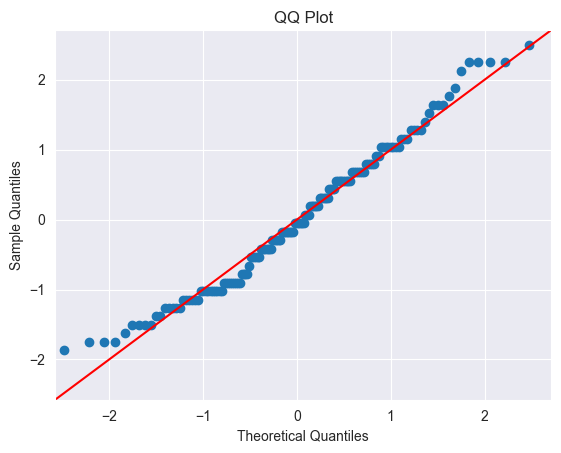

In [9]:
# using statsmodel

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create a QQ plot of the two sets of data
fig = sm.qqplot(df['sepal_length'], line='45', fit=True)

# Add a title and labels to the plot
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.show()

## Uniform Data

In [10]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate a set of random daa
x = np.random.uniform(low=0, high=1, size=1000)

print(x[:10])

[0.34338676 0.25399611 0.28670394 0.80070168 0.51601686 0.91644922
 0.61296541 0.33656058 0.28372412 0.05716572]


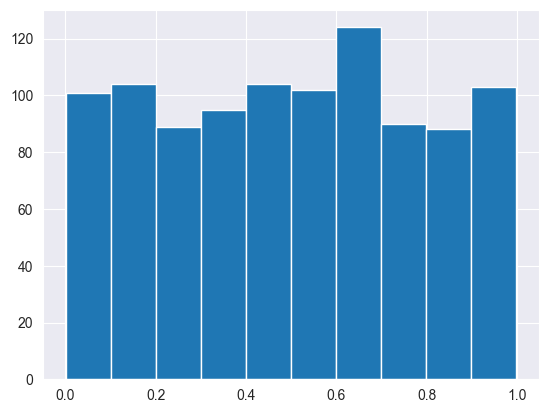

In [11]:
# as you can see it is a uniform data, the data is spread evenly across the range
# These are random numbers from 0 to 1
plt.hist(x)
plt.show()

In [12]:
# Fit a uniform distribution to the data
params = stats.uniform.fit(x)
print(
    "Location parameter (a) lower bound of the uniform distribution (where the range of the distribution starts): \n\nparams[0]",
    params[0])
print("-" * 50,
      "\nScale parameter (b−a) width or spread of the distribution (upper bound (b) b = a + scale): \n\nparams[1]",
      params[1])

Location parameter (a) lower bound of the uniform distribution (where the range of the distribution starts): 

params[0] 0.0001383906189081907
-------------------------------------------------- 
Scale parameter (b−a) width or spread of the distribution (upper bound (b) b = a + scale): 

params[1] 0.9984227800120741


In [13]:
dist = stats.uniform(loc=params[0], scale=params[1])

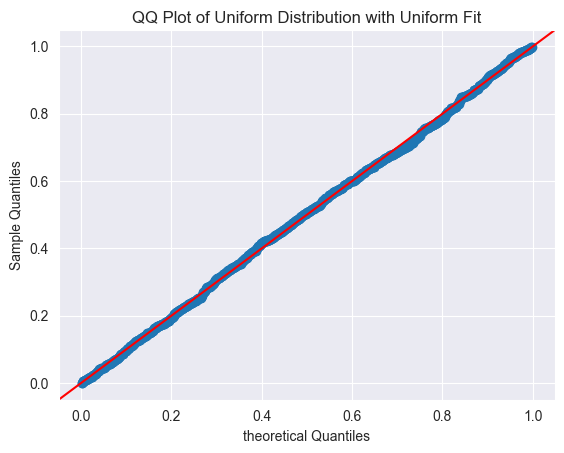

In [14]:
# Create a QQ Plot of the data using the uniform distribution
fig = sm.qqplot(x, dist=dist, line='45')

# Add a title and labels to the plot
plt.title('QQ Plot of Uniform Distribution with Uniform Fit')
plt.xlabel('theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

## Log Log Plot of Pareto Distribution

In [15]:
# Create an array of x values
x = np.linspace(0.1, 10, 1000)

print(x[:10])

[0.1        0.10990991 0.11981982 0.12972973 0.13963964 0.14954955
 0.15945946 0.16936937 0.17927928 0.18918919]


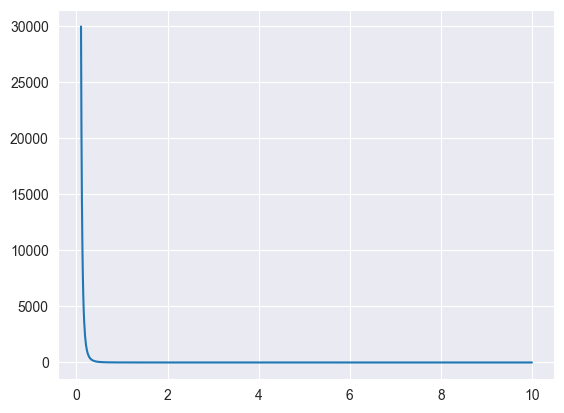

In [16]:
# Define the parameters of the Pareto Distribution
alpha = 3
xm = 1

# Calculate the y values of the Pareto distribution
y = alpha * (xm ** alpha) / (x ** (alpha + 1))

plt.plot(x, y)
plt.show()

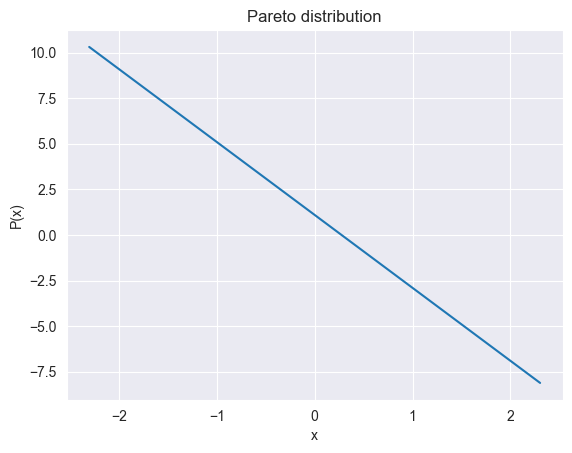

In [17]:
# Create the log-log Plot
plt.plot(np.log(x), np.log(y))

# Add labels and a title
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Pareto distribution')
plt.show()

In [18]:
import scipy.stats as stats
import statsmodels.api as sm

# Define the parameters of the Pareto distribution
alpha = 2
xm = 1

# Generate a set of  random data from the Pareto Distribution
x = stats.pareto.rvs(b=alpha, scale=xm, size=1000)

print(x[:10])

[1.00588066 1.99706043 4.54335632 1.61508121 1.00338496 3.8390155
 1.35602659 1.03571385 1.17918144 1.25459968]


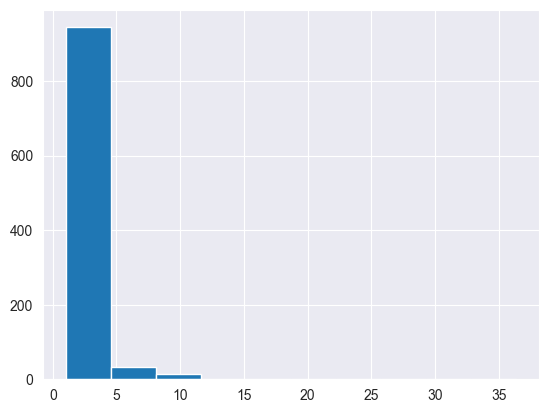

In [19]:
plt.hist(x)
plt.show()

In [20]:
# Fit a Pareto distribution to the data
params = stats.pareto.fit(x, floc=0)

print("Shape params[0] (alpha): ", params[0])
print("Scale params[2] (xm): ", params[2])

Shape params[0] (alpha):  1.9638149720663163
Scale params[2] (xm):  1.0008133865934565


In [21]:
# Create a Pareto distribution object with the fitted parameters
dist = stats.pareto(b=params[0], scale=params[2])

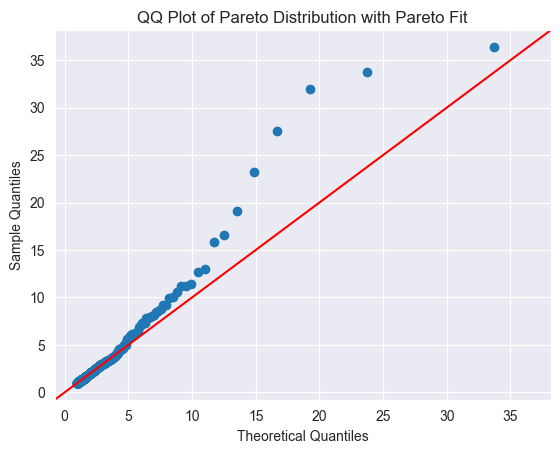

In [22]:
# Create a QQ plot of the data using the Pareto Distribution 
fig = sm.qqplot(x, dist=dist, line='45')

plt.title('QQ Plot of Pareto Distribution with Pareto Fit')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

## Session 30 - Function Transformer
- Log Transform
- x square
- square root

In [23]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [24]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
print(df.shape)
df.head()

(891, 3)


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [25]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [26]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\15105\AppData\Local\Temp\ipykernel_33980\1226013979.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [27]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [28]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

print(X[:5], '\n')
print(y[:5])

    Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500 

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

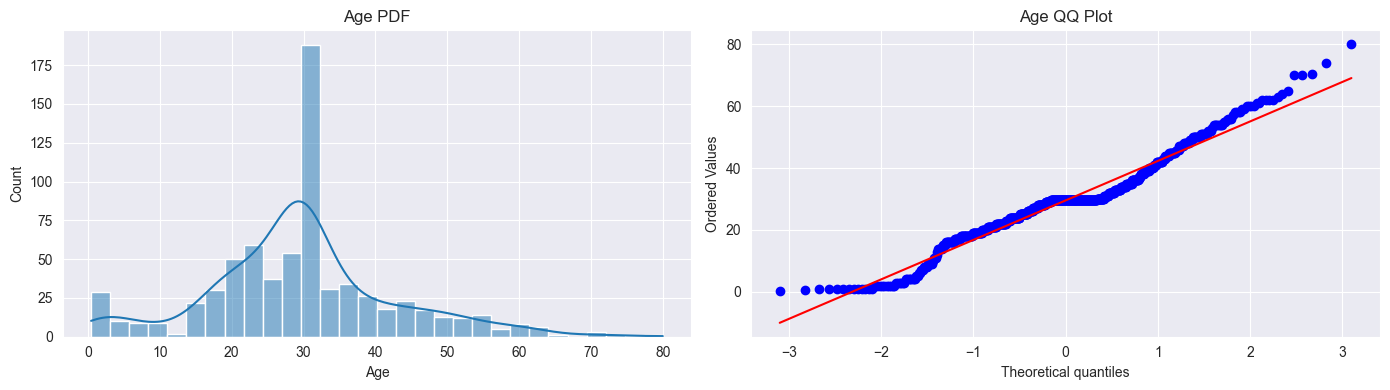

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(X_train['Age'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Age PDF')

stats.probplot(X_train['Age'], dist='norm', plot=axes[1])
axes[1].set_title('Age QQ Plot')

plt.tight_layout()
plt.show()

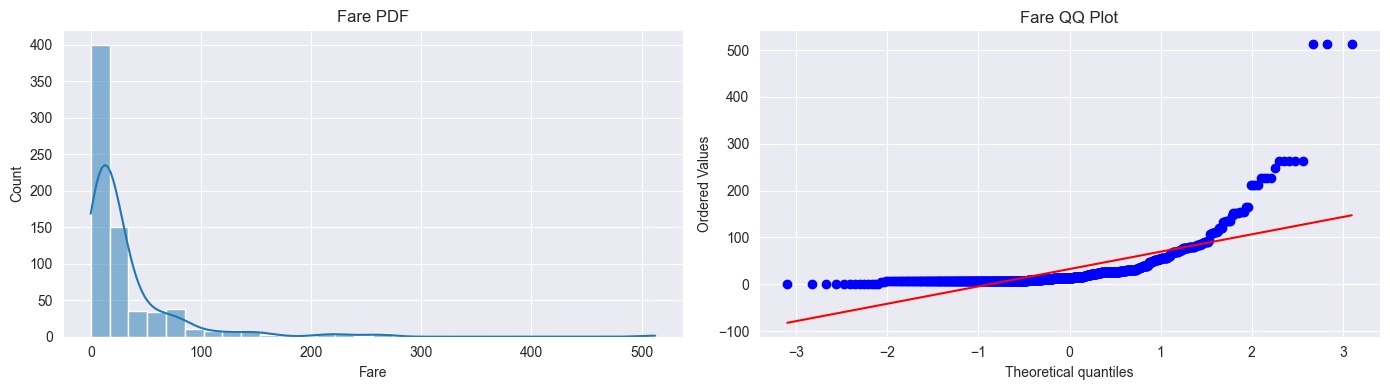

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(X_train['Fare'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Fare PDF')

stats.probplot(X_train['Fare'], dist='norm', plot=axes[1])
axes[1].set_title('Fare QQ Plot')

plt.tight_layout()
plt.show()

In [32]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [33]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print('Accuracy LR: ', accuracy_score(y_test, y_pred))
print('Accuracy DT: ', accuracy_score(y_test, y_pred1))

Accuracy LR:  0.6480446927374302
Accuracy DT:  0.6759776536312849


#### Log Transforming the data

In [34]:
trf = FunctionTransformer(func=np.log1p)

In [35]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [36]:
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print('Accuracy LR: ', accuracy_score(y_test, y_pred))
print('Accuracy DT: ', accuracy_score(y_test, y_pred1))

Accuracy LR:  0.6815642458100558
Accuracy DT:  0.6703910614525139


In [37]:
## Performing cross validation by applying transformation on the whole date
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
trf = FunctionTransformer(func=np.log1p)

pipeline = Pipeline([('transform', trf), ('clf', clf)])
pipeline2 = Pipeline([('transform', trf), ('clf', clf2)])

print('LR', np.mean(cross_val_score(pipeline, X, y, scoring='accuracy', cv=10)))
print('DT', np.mean(cross_val_score(pipeline2, X, y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6599500624219725


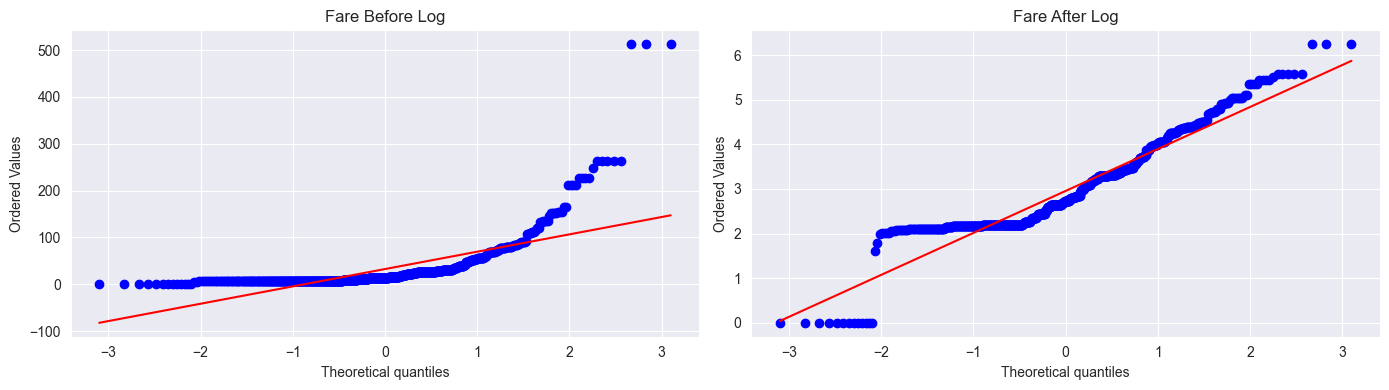

In [38]:
X_train_transformed = X_train.copy()  # Make a copy of the dataset to preserve the original
X_train_transformed['Fare'] = trf.fit_transform(X_train[['Fare']])

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

stats.probplot(X_train['Fare'], dist='norm', plot=axes[0])
axes[0].set_title('Fare Before Log')

stats.probplot(X_train_transformed['Fare'], dist='norm', plot=axes[1])
axes[1].set_title('Fare After Log')

plt.tight_layout()
plt.show()

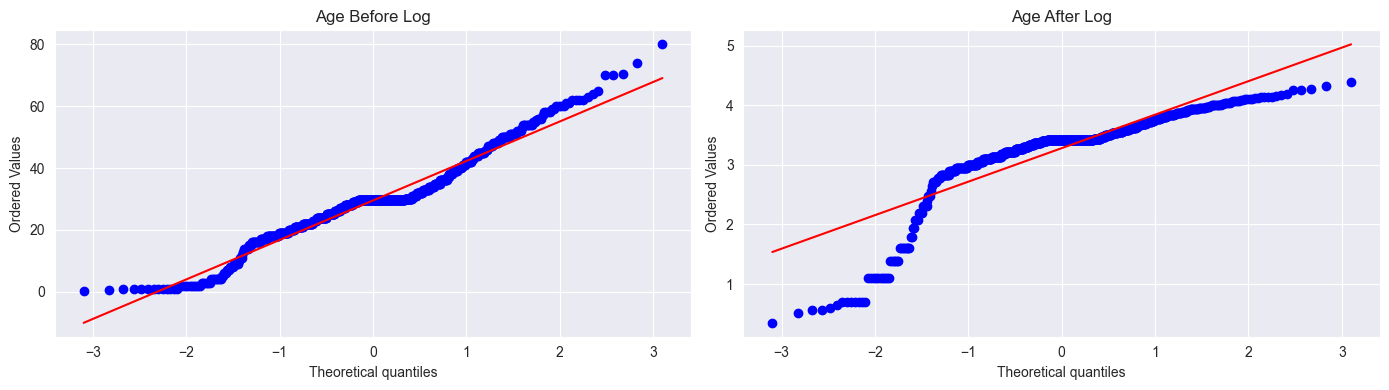

In [39]:
X_train_transformed = X_train.copy()  # Make a copy of the dataset to preserve the original
X_train_transformed['Age'] = trf.fit_transform(X_train[['Age']])

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

stats.probplot(X_train['Age'], dist='norm', plot=axes[0])
axes[0].set_title('Age Before Log')

stats.probplot(X_train_transformed['Age'], dist='norm', plot=axes[1])
axes[1].set_title('Age After Log')

plt.tight_layout()
plt.show()

### Column Transformer

In [40]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [41]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

print('Accuracy LR: ', accuracy_score(y_test, y_pred))
print('Accuracy DT: ', accuracy_score(y_test, y_pred2))

Accuracy LR:  0.6703910614525139
Accuracy DT:  0.6703910614525139


In [42]:
pipeline = Pipeline([('transform', trf2), ('clf', clf)])
pipeline2 = Pipeline([('transform', trf2), ('clf', clf2)])

print('LR: ', np.mean(cross_val_score(pipeline, X, y, scoring='accuracy', cv=10)))
print('DT: ', np.mean(cross_val_score(pipeline2, X, y, scoring='accuracy', cv=10)))

LR:  0.6712609238451936
DT:  0.6633458177278402


In [43]:
def apply_transform_with_pipeline(transform):
    # Split data
    X = df.iloc[:, 1:3]
    y = df.iloc[:, 0]

    # Create the pipeline
    pipeline = Pipeline([
        ('preprocessor', ColumnTransformer([
            ('log', FunctionTransformer(transform), ['Fare'])
        ], remainder='passthrough')),
        ('clf', LogisticRegression())
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=10)
    print("Accuracy:", np.mean(scores))

    # Extract the transformed data for visualization
    preprocessor = pipeline.named_steps['preprocessor']
    X_trans = preprocessor.fit_transform(X)

    # Plotting before and after transformation
    plt.figure(figsize=(14, 4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:, 0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy: 0.6589013732833957


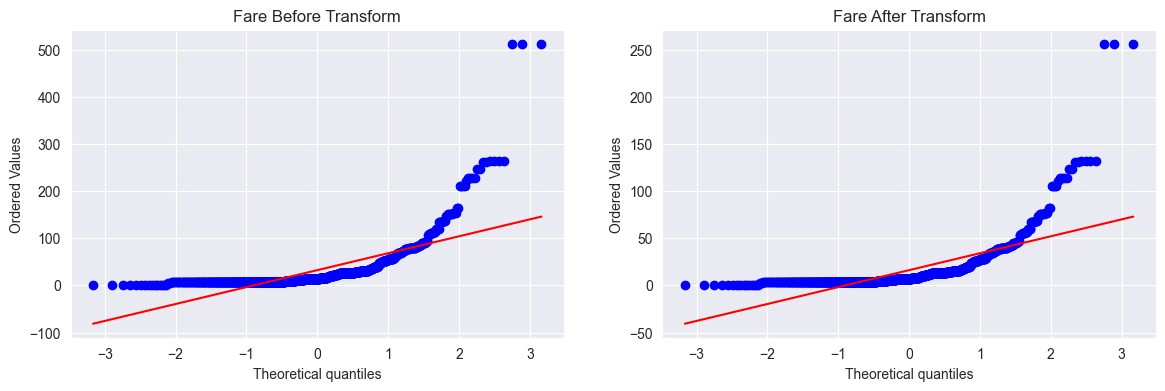

In [44]:
apply_transform_with_pipeline(lambda x: x ** 1 / 2)

Accuracy: 0.6195131086142323


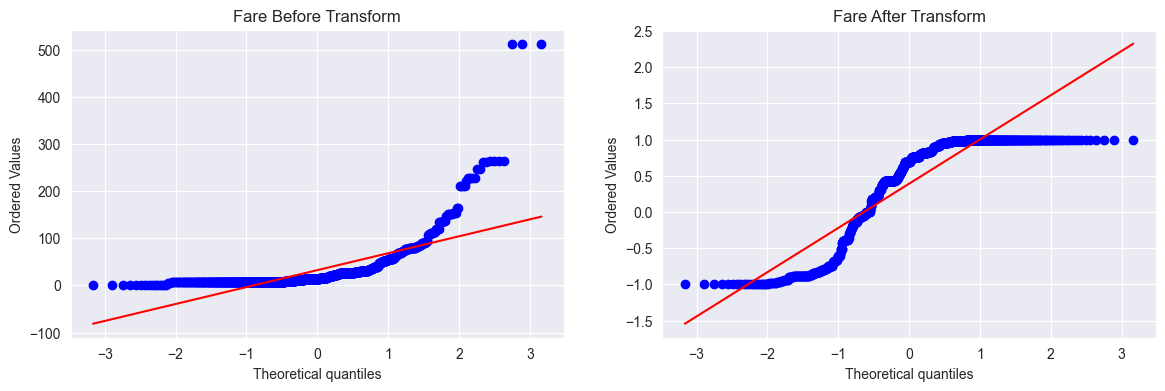

In [45]:
apply_transform_with_pipeline(np.sin)

## Session 31 - Power Transformer
- Box - cox
- Yeo-Johnson

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [48]:
df = pd.read_csv('concrete_data.csv')
print(df.shape)
df.head()

(1030, 9)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [49]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [50]:
# To check the minimum values and if any values are 0 or less than 0 in any column
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [51]:
X = df.drop(columns=['Strength'])
y = df.iloc[:, -1]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Applying Regression without any transformation
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2_score(y_test, y_pred)

0.6275531792314848

In [54]:
# Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr, X, y, scoring='r2'))

0.46099404916628683

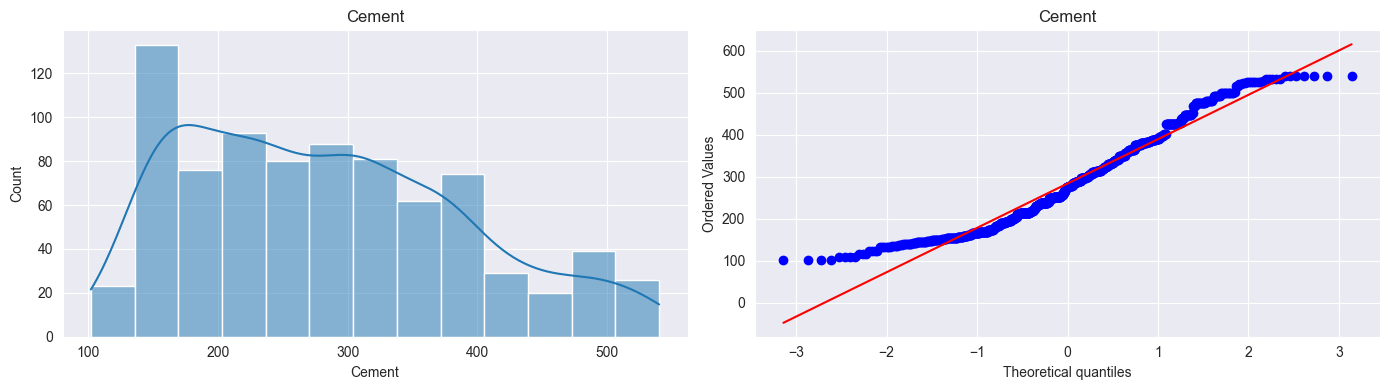

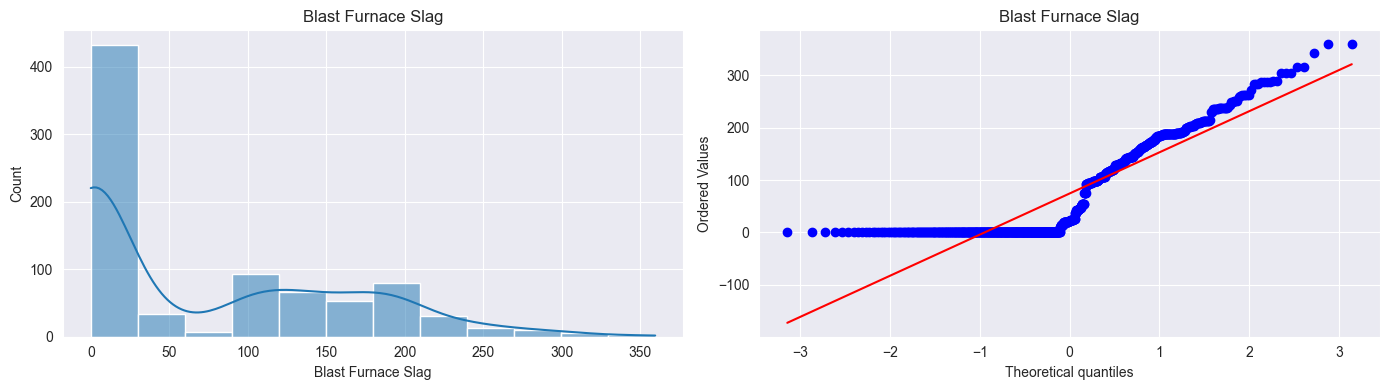

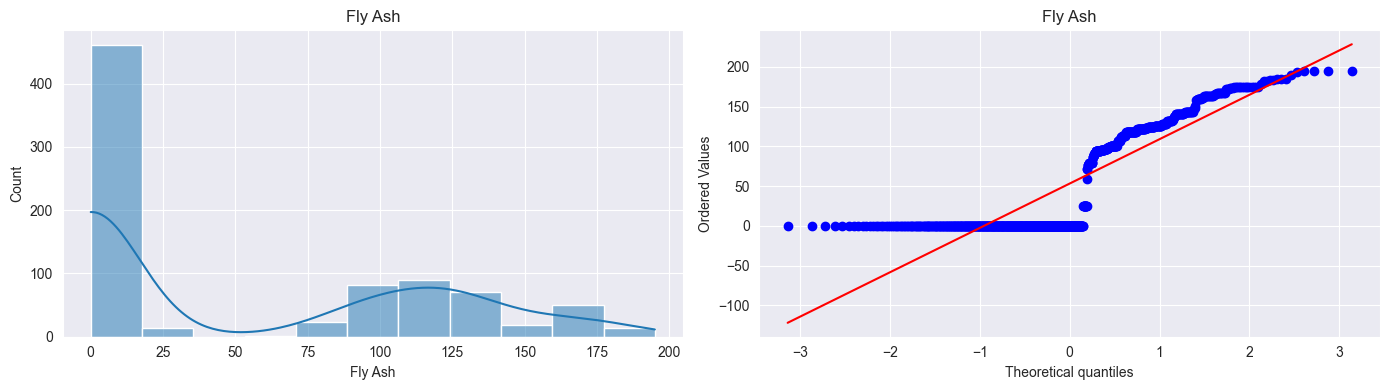

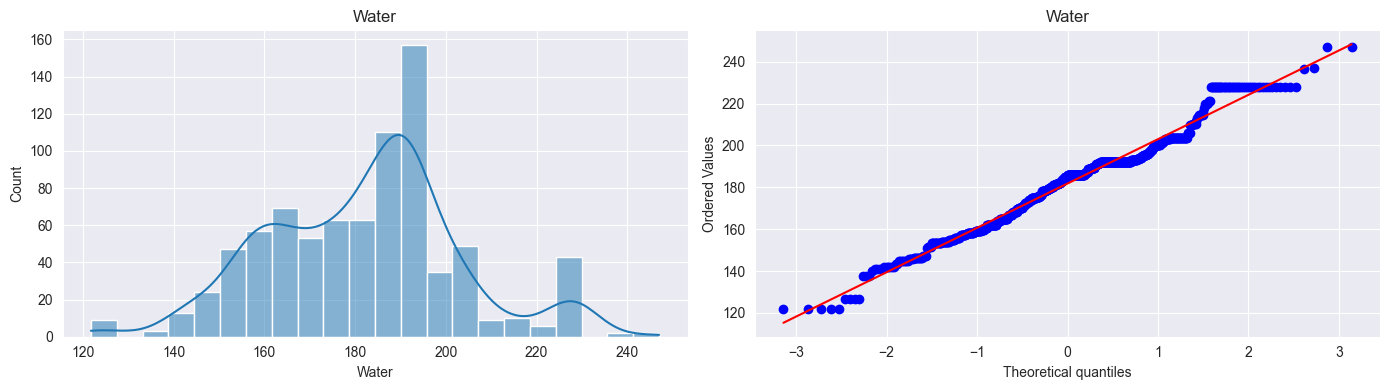

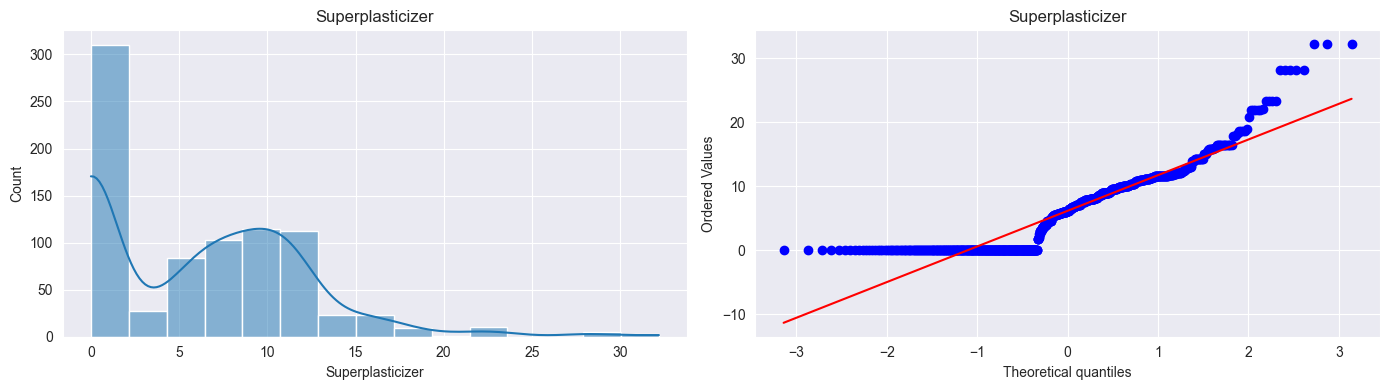

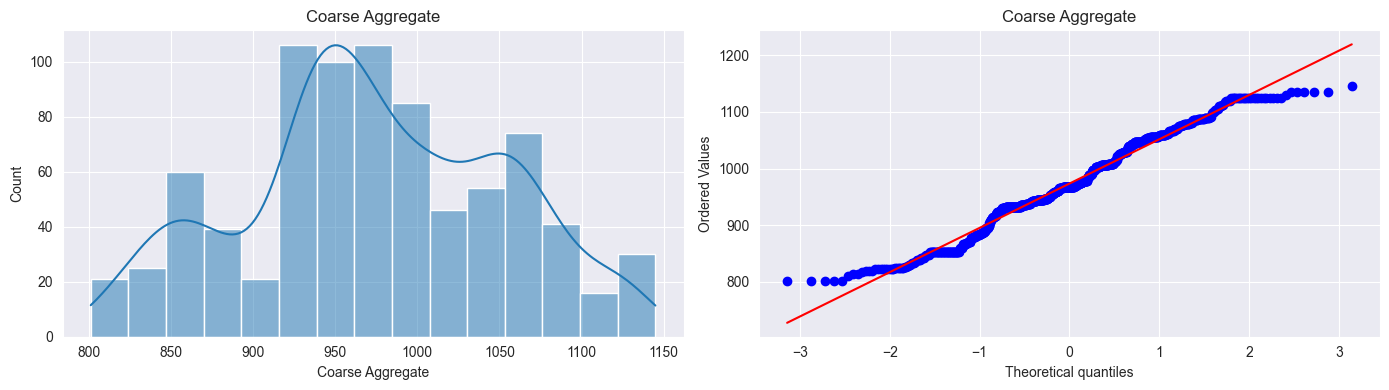

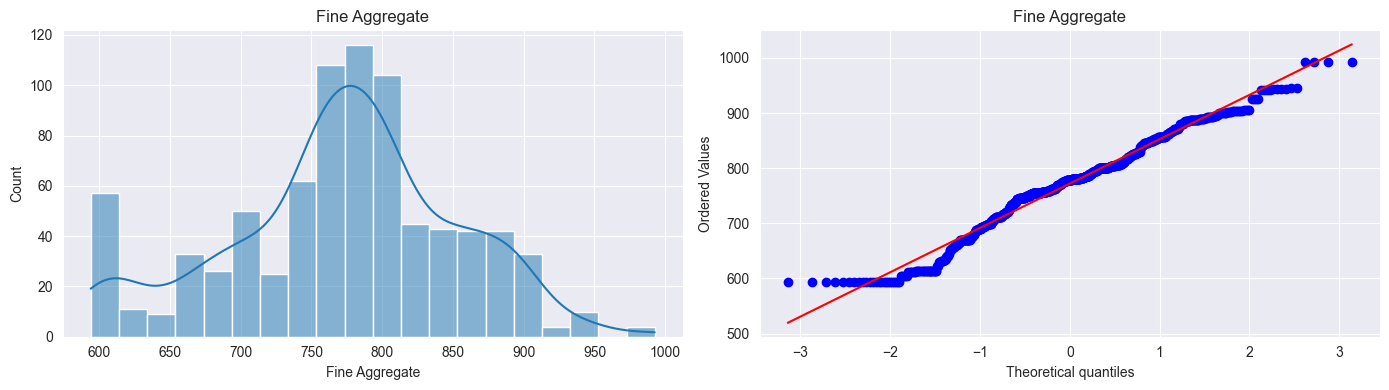

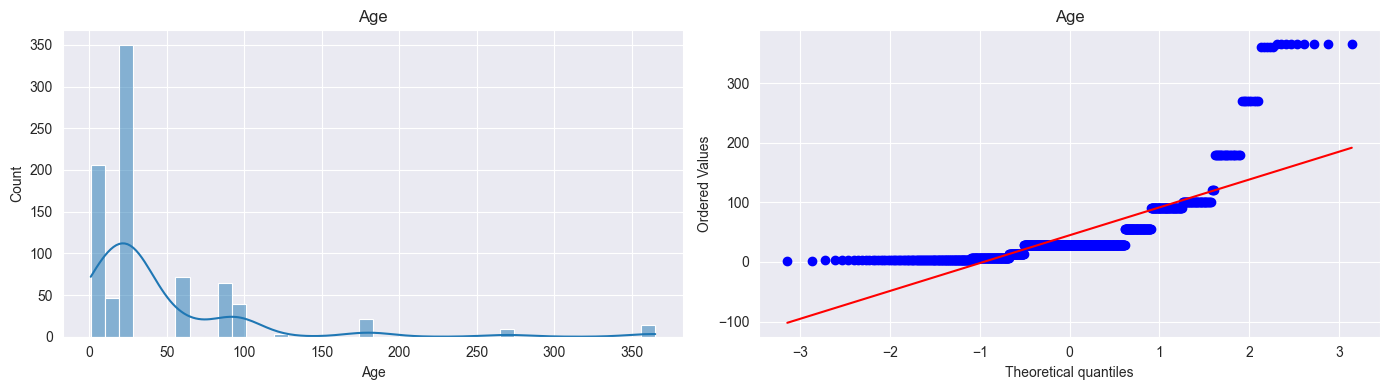

In [55]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.tight_layout()
    plt.show()

#### Applying Box-Cox Transform

In [56]:
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train + 0.000000001)
X_test_transformed = pt.transform(X_test + 0.000000001)

pd.DataFrame({'col': X_train.columns, 'box_cox_lambdas': pt.lambdas_})

,col,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.019115
2,Fly Ash,-0.028337
3,Water,0.772682
4,Superplasticizer,0.070353
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [57]:
# Applying Linear Regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test, y_pred2)

0.8034834014372435

In [58]:
# using cross val score
# using the pipeline 

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('box-cox', PowerTransformer(method='box-cox'), slice(0, X.shape[1]))
    ], remainder='passthrough')),
    ('model', LinearRegression())
])

scores = cross_val_score(pipeline, X + 1e-7, y, scoring='r2', cv=10)
print('Mean r^2 score: ', np.mean(scores))

Mean r^2 score:  0.6374512954883629


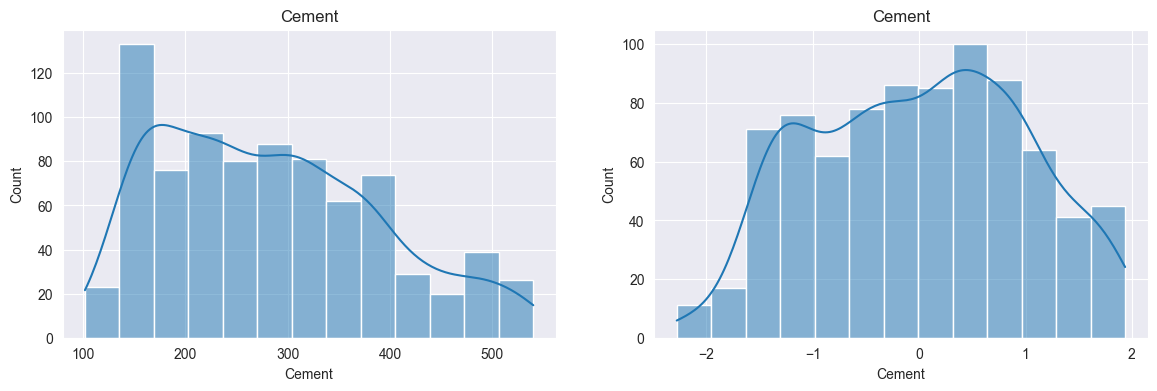

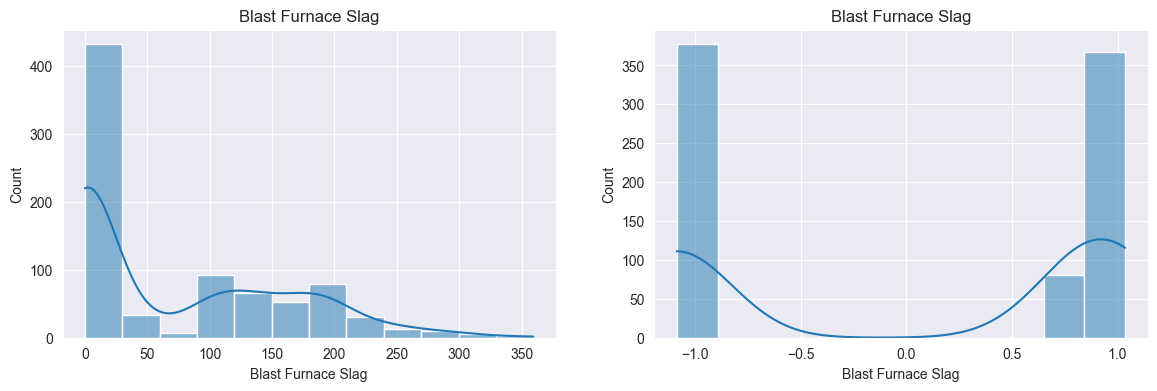

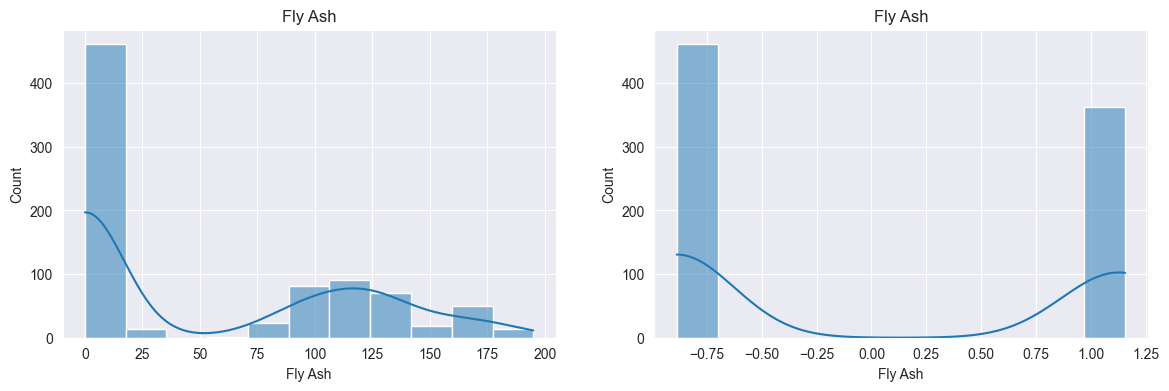

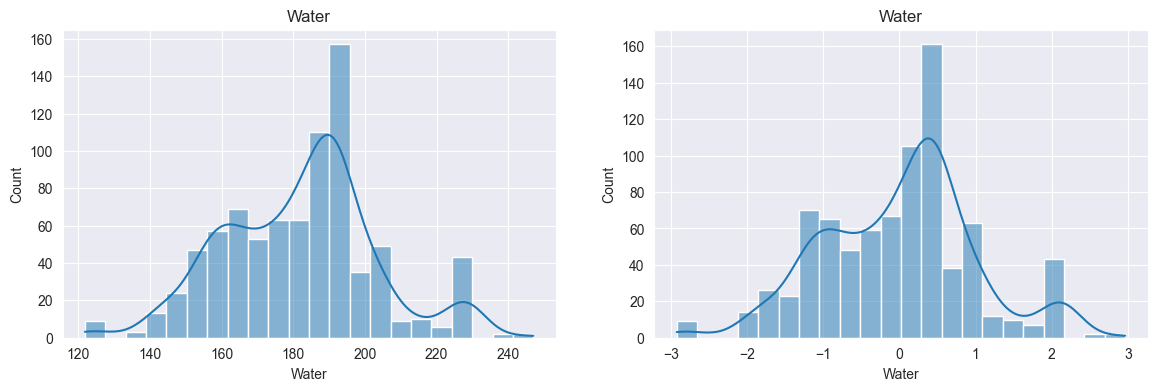

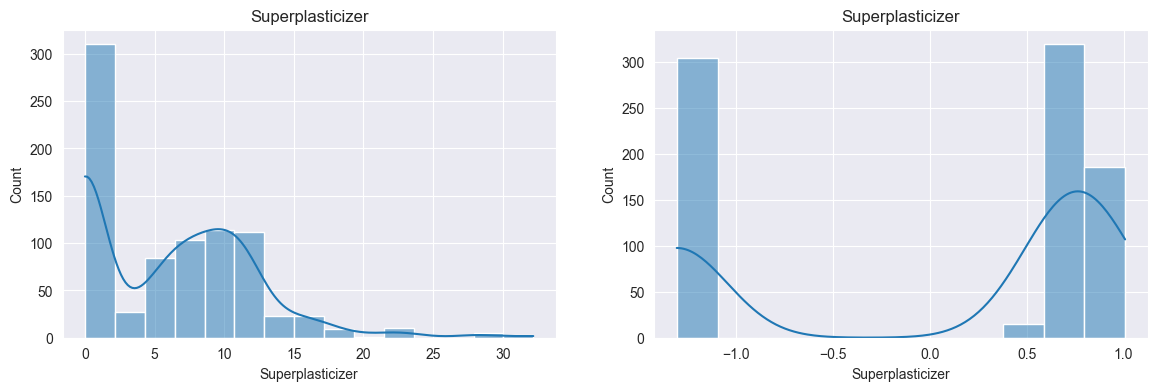

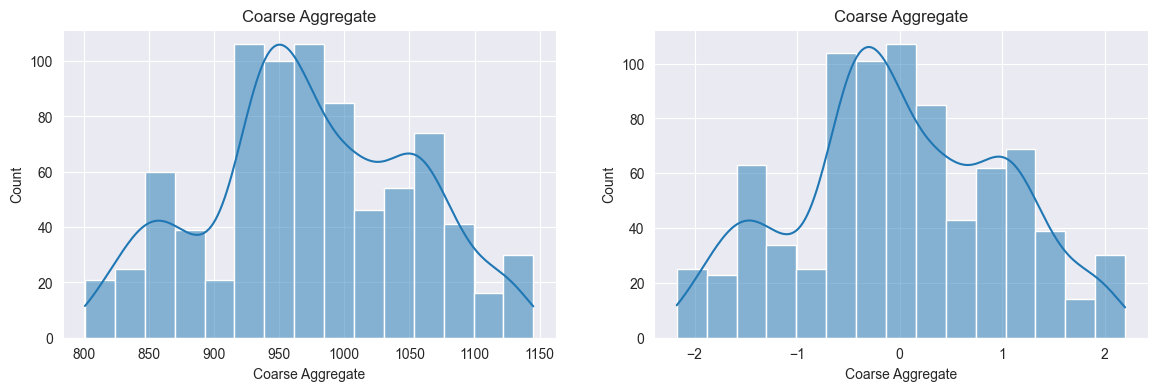

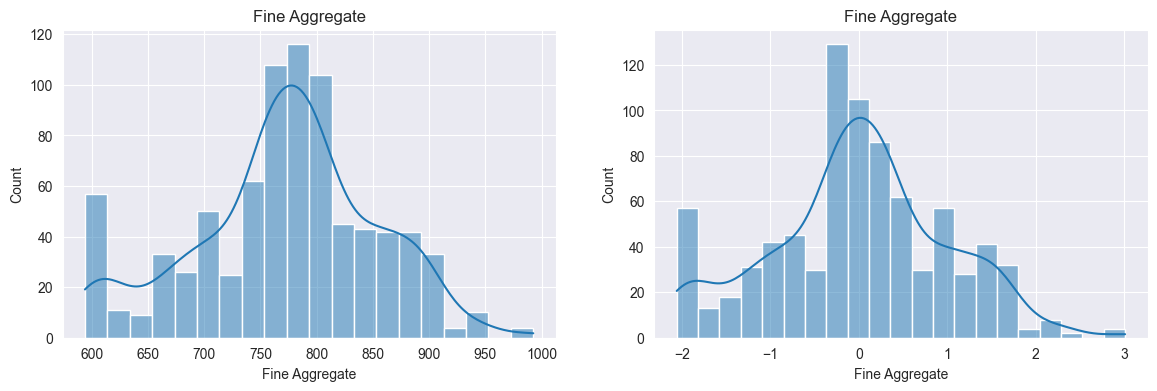

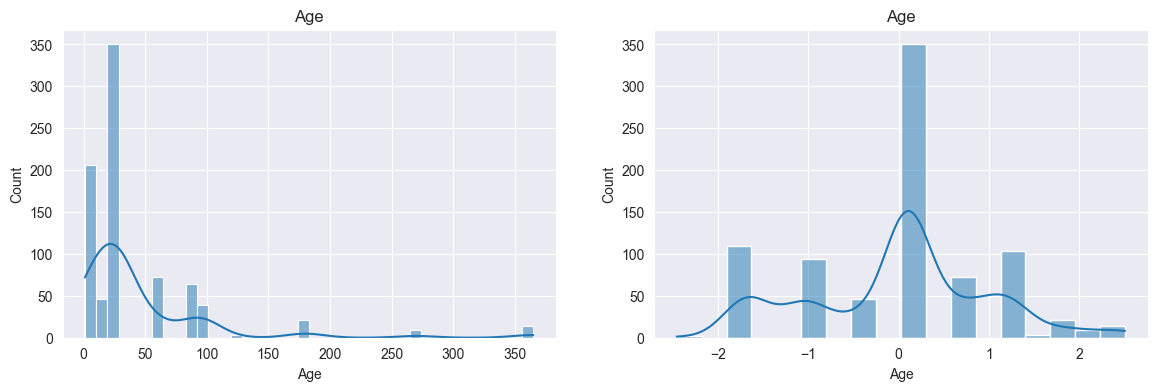

In [59]:
# Before and after comparison for Box-Cox Plot 
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed[col], kde=True)
    plt.title(col)

    plt.show()


## Apply Yeo-Johnson transform

In [60]:
pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2, y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test, y_pred3))

pd.DataFrame({'cols': X_train.columns, 'Yeo_Johnson_lambdas': pt1.lambdas_})

0.8161906513339307


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [61]:
# Applying cross cal score
# using the pipeline 

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('box-cox', PowerTransformer(), slice(0, X.shape[1]))
    ], remainder='passthrough')),
    ('model', LinearRegression())
])

scores = cross_val_score(pipeline, X + 1e-7, y, scoring='r2', cv=10)
print('Mean r^2 score: ', np.mean(scores))

Mean r^2 score:  0.6517878180150947


In [62]:

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

X_train_transformed2 = pd.DataFrame(X_train_transformed2, columns=X_train.columns)

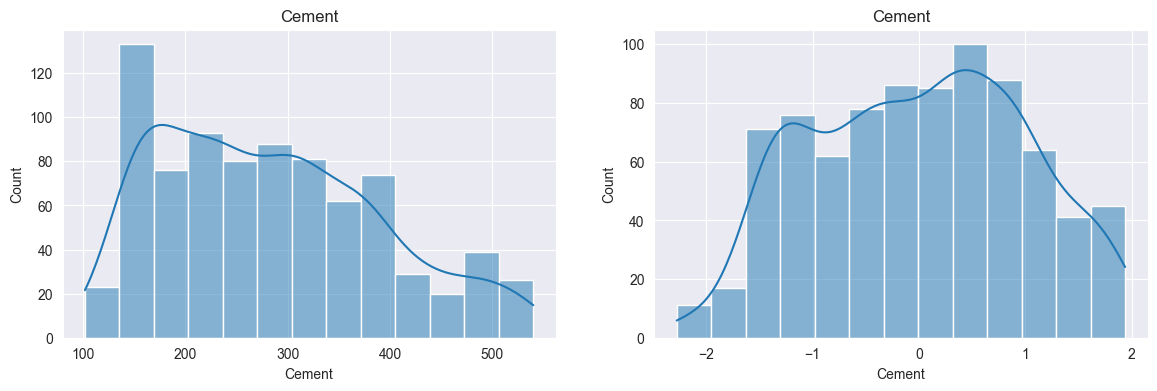

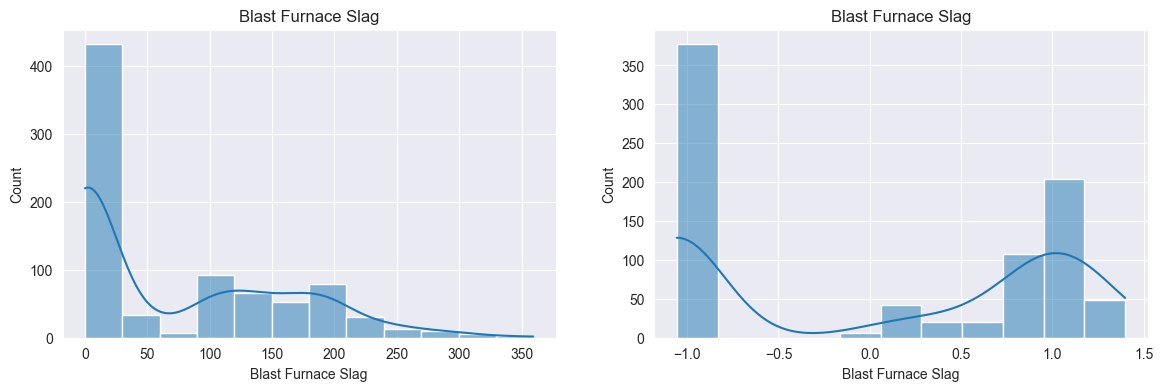

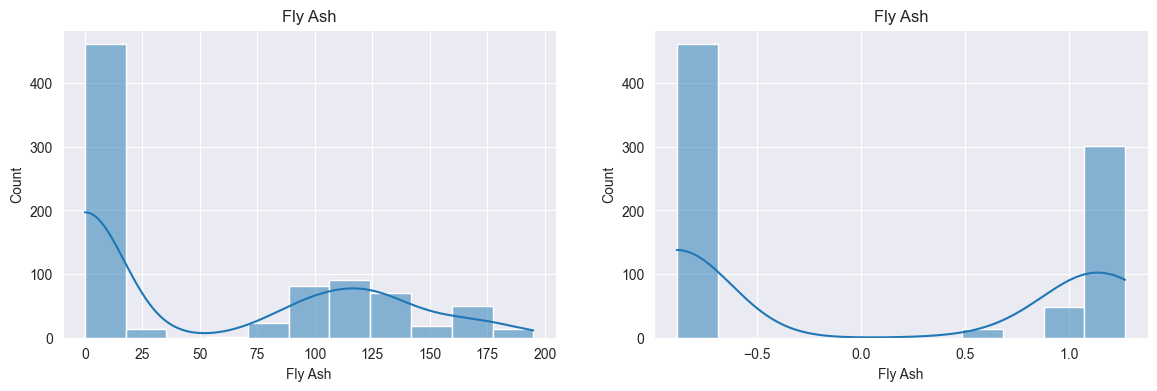

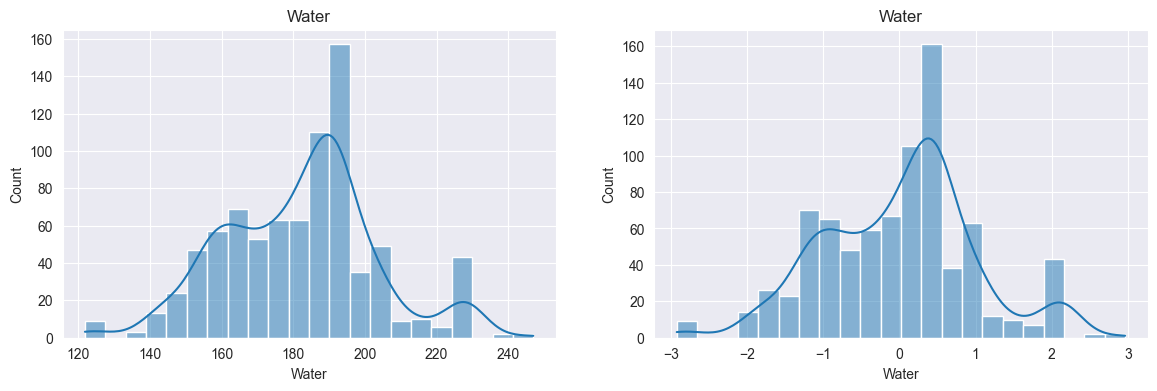

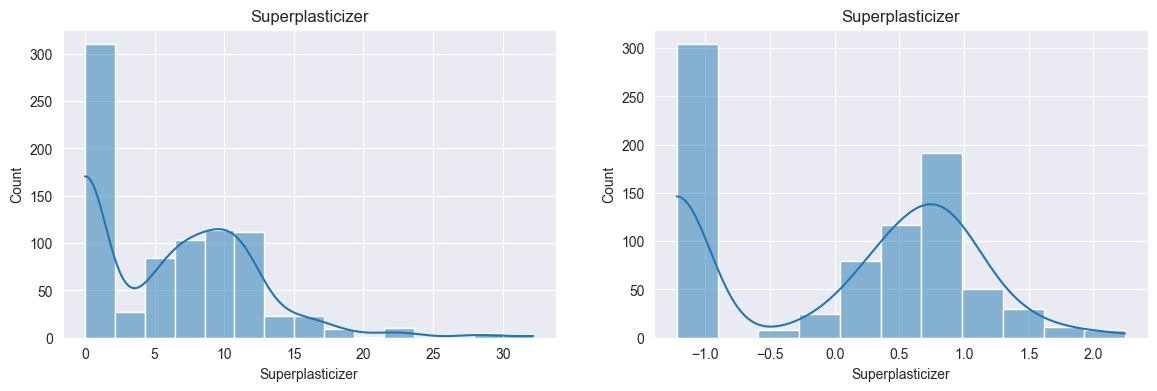

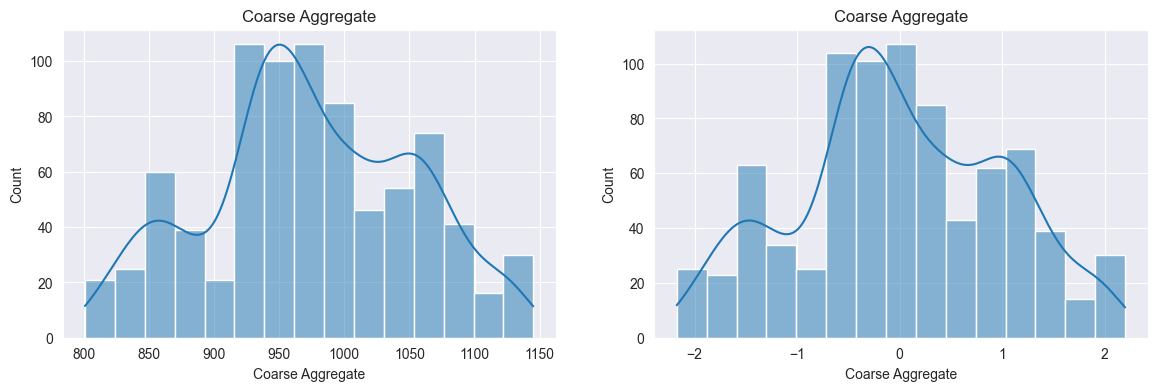

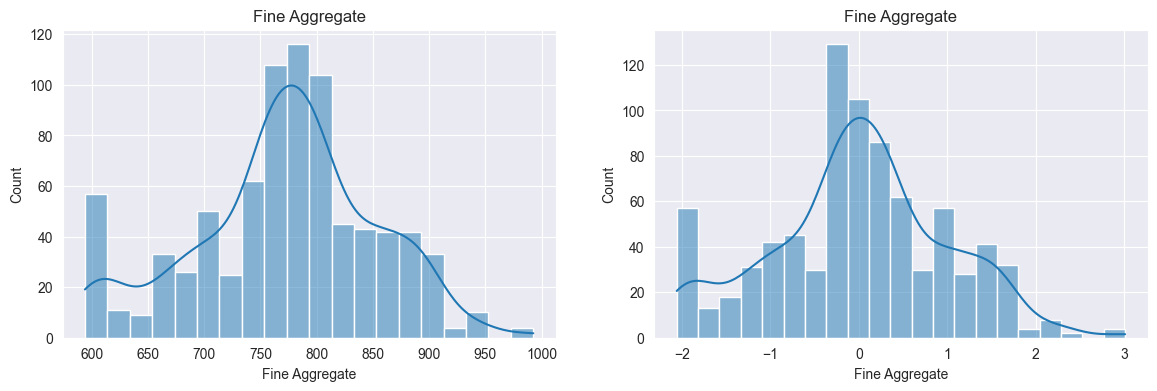

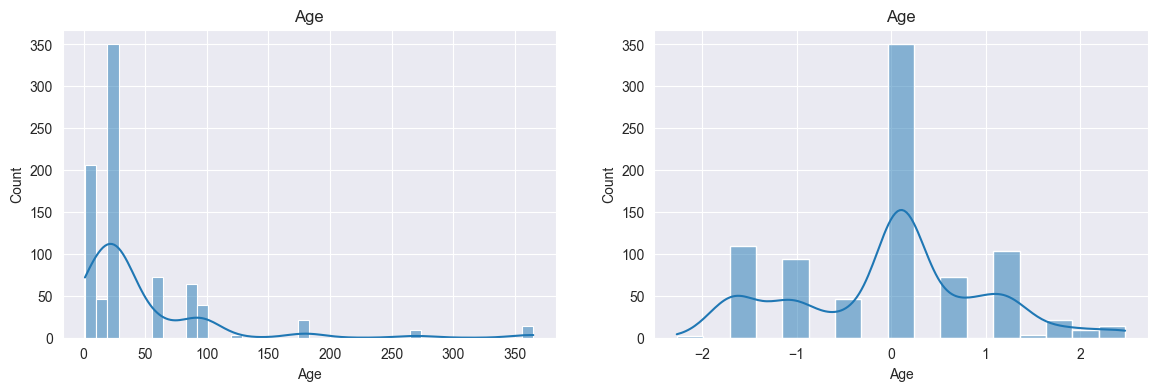

In [63]:
for col in X_train_transformed2.columns:
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed2[col], kde=True)
    plt.title(col)

    plt.show()

In [64]:
# Side by Side lambdas
pd.DataFrame({'cols': X_train.columns, 'box-cox-lambdas': pt.lambdas_, 'Yeo-Johnson-Lambdas': pt1.lambdas_})

,cols,box-cox-lambdas,Yeo-Johnson-Lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830763,1.783100
7,Age,0.001771,0.019885
